In [1]:
%matplotlib widget
import numpy as np
import pygimli as pg
from pygimli.physics import ert
import pygimli.meshtools as mt

import matplotlib.pyplot as plt
import os
from cmcrameri import cm

In [2]:
#name = 'VeryFineMeshRemBadAndKinda'
#name = 'VeryFineMeshRobust-clen1-1'

# Try again with blocky model and dPhi=-100 and pd=4

name = 'newTopo-VeryVeryFineMeshRobustRemAllBad-Blocky'
removeBad=True
removeKinda=True
#clens = [2,2]
clens = None
robDat = True
blocky = True
dPhi = -100 #-100 # 0.1
pdx=0.3; pmcs=0.3; pd=4
#pdx=0.5; pmcs=0.5; pd=3.5

In [3]:
filename='TANGLEWOOD1_Plattner4andDip_realElecs.txt'

In [4]:
mgr = ert.ERTIPManager(filename,fd=False)
# Fix topo. The original data had elevation values with an offset
elecs = mgr.data.sensors().array()
#print(elecs)
#help(mgr.data.setSensors())
new = np.loadtxt('ERT_survey_updated_nohead.csv', delimiter=',')
elecs[:,2] = new[:,1]
mgr.data.setSensors(elecs)
#print(mgr.data.sensors().array())

mgr.data['k'] = ert.geometricFactors(mgr.data)
mgr.data.estimateError(relativeError=0.02)

05/06/24 - 17:41:51 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
05/06/24 - 17:41:51 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns


/home/alainplattner/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/visualization.py:344: RuntimeWarning: divide by zero encountered in divide
  ne = np.round(xe/de)
/home/alainplattner/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/visualization.py:344: RuntimeWarning: invalid value encountered in divide
  ne = np.round(xe/de)
/home/alainplattner/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/visualization.py:392: RuntimeWarning: invalid value encountered in subtract
  ab, am, an = np.abs(a-b), np.abs(a-m), np.abs(a-n)
/home/alainplattner/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/visualization.py:393: RuntimeWarning: invalid value encountered in subtract
  bm, bn, mn = np.abs(b-m), np.abs(b-n), np.abs(m-n)
/home/alainplattner/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/visualization.py:400: RuntimeWarning: invalid value encountered in subtract
  sep = np.abs(a-m)  # * mI # does n

Data: Sensors: 96 data: 1336, nonzero entries: ['', 'A(adr)', 'B(adr)', 'Channel', 'DPID', 'IP_#1(mV/V)', 'IP_#10(mV/V)', 'IP_#11(mV/V)', 'IP_#12(mV/V)', 'IP_#13(mV/V)', 'IP_#14(mV/V)', 'IP_#2(mV/V)', 'IP_#3(mV/V)', 'IP_#4(mV/V)', 'IP_#5(mV/V)', 'IP_#6(mV/V)', 'IP_#7(mV/V)', 'IP_#8(mV/V)', 'IP_#9(mV/V)', 'IP_dV_#1(mV)', 'IP_dV_#10(mV)', 'IP_dV_#11(mV)', 'IP_dV_#12(mV)', 'IP_dV_#13(mV)', 'IP_dV_#14(mV)', 'IP_dV_#2(mV)', 'IP_dV_#3(mV)', 'IP_dV_#4(mV)', 'IP_dV_#5(mV)', 'IP_dV_#6(mV)', 'IP_dV_#7(mV)', 'IP_dV_#8(mV)', 'IP_dV_#9(mV)', 'M(adr)', 'MeasID', 'N(adr)', 'Pint(V)', 'T_int(deg_C)', 'T_log(deg_C)', 'Uout(V)', 'a', 'b', 'err', 'i', 'k', 'm', 'n', 'r', 'rhoa', 'stacks', 'u', 'valid']


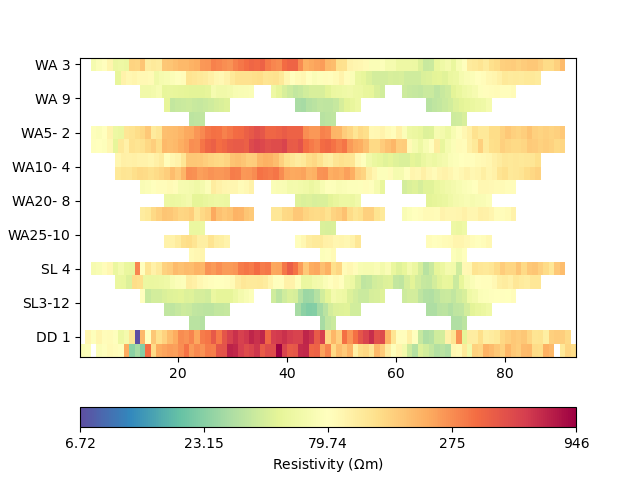

In [5]:
mgr.showData()
print(mgr.data)

/home/alainplattner/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/visualization.py:344: RuntimeWarning: divide by zero encountered in divide
  ne = np.round(xe/de)
/home/alainplattner/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/visualization.py:344: RuntimeWarning: invalid value encountered in divide
  ne = np.round(xe/de)
/home/alainplattner/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/visualization.py:392: RuntimeWarning: invalid value encountered in subtract
  ab, am, an = np.abs(a-b), np.abs(a-m), np.abs(a-n)
/home/alainplattner/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/visualization.py:393: RuntimeWarning: invalid value encountered in subtract
  bm, bn, mn = np.abs(b-m), np.abs(b-n), np.abs(m-n)
/home/alainplattner/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/visualization.py:400: RuntimeWarning: invalid value encountered in subtract
  sep = np.abs(a-m)  # * mI # does n

Data: Sensors: 96 data: 1241, nonzero entries: ['', 'A(adr)', 'B(adr)', 'Channel', 'DPID', 'IP_#1(mV/V)', 'IP_#10(mV/V)', 'IP_#11(mV/V)', 'IP_#12(mV/V)', 'IP_#13(mV/V)', 'IP_#14(mV/V)', 'IP_#2(mV/V)', 'IP_#3(mV/V)', 'IP_#4(mV/V)', 'IP_#5(mV/V)', 'IP_#6(mV/V)', 'IP_#7(mV/V)', 'IP_#8(mV/V)', 'IP_#9(mV/V)', 'IP_dV_#1(mV)', 'IP_dV_#10(mV)', 'IP_dV_#11(mV)', 'IP_dV_#12(mV)', 'IP_dV_#13(mV)', 'IP_dV_#14(mV)', 'IP_dV_#2(mV)', 'IP_dV_#3(mV)', 'IP_dV_#4(mV)', 'IP_dV_#5(mV)', 'IP_dV_#6(mV)', 'IP_dV_#7(mV)', 'IP_dV_#8(mV)', 'IP_dV_#9(mV)', 'M(adr)', 'MeasID', 'N(adr)', 'Pint(V)', 'T_int(deg_C)', 'T_log(deg_C)', 'Uout(V)', 'a', 'b', 'err', 'i', 'k', 'm', 'n', 'r', 'rhoa', 'stacks', 'u', 'valid']


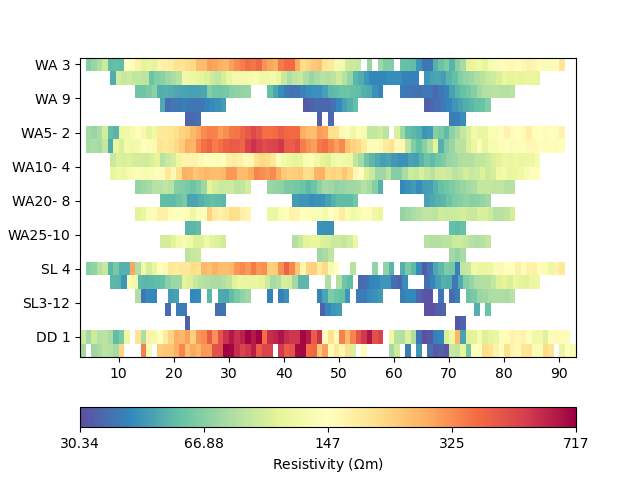

In [6]:
#help(mgr)
#mgr.data.remove(mgr.data["rhoa"] > 900)
#mgr.data.remove(mgr.data["rhoa"] < 30)
# Delete "bad data" identified in weird decay curves



if removeBad:
    badData = np.loadtxt('badData.txt',delimiter=',')
    for i in range(0,badData.shape[0]):
        nr = mgr.data.getIndices(a=badData[i,0]-1, b=badData[i,1]-1, m=badData[i,2]-1, n=badData[i,3]-1)
        mgr.data.remove(nr)

if removeKinda:
    badData = np.loadtxt('kindaBadData.txt',delimiter=',')
    for i in range(0,badData.shape[0]):
        nr = mgr.data.getIndices(a=badData[i,0]-1, b=badData[i,1]-1, m=badData[i,2]-1, n=badData[i,3]-1)
        mgr.data.remove(nr)

mgr.data.remove(mgr.data["rhoa"] < 30)
mgr.data.remove(mgr.data["rhoa"] > 900)

mgr.showData()
print(mgr.data)
plt.savefig('data-res-filtered.pdf')

/home/alainplattner/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/visualization.py:344: RuntimeWarning: divide by zero encountered in divide
  ne = np.round(xe/de)
/home/alainplattner/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/visualization.py:344: RuntimeWarning: invalid value encountered in divide
  ne = np.round(xe/de)
/home/alainplattner/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/visualization.py:392: RuntimeWarning: invalid value encountered in subtract
  ab, am, an = np.abs(a-b), np.abs(a-m), np.abs(a-n)
/home/alainplattner/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/visualization.py:393: RuntimeWarning: invalid value encountered in subtract
  bm, bn, mn = np.abs(b-m), np.abs(b-n), np.abs(m-n)
/home/alainplattner/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/visualization.py:400: RuntimeWarning: invalid value encountered in subtract
  sep = np.abs(a-m)  # * mI # does n

3.19647352118605
202.079552892762


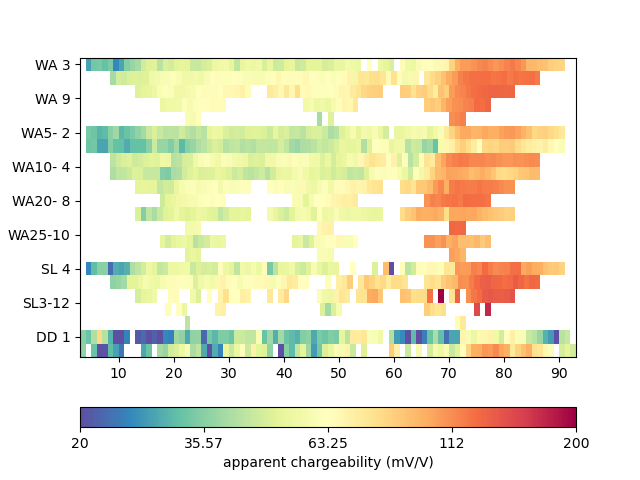

In [7]:
mgr.showData(vals="IP_#1(mV/V)", label='apparent chargeability (mV/V)', cMin=20, cMax=200)#cMap='cm.imola')# xlabel='apparent chargeability (mV/V)'
print(np.min(mgr.data["IP_#1(mV/V)"]))
print(np.max(mgr.data["IP_#1(mV/V)"]))
#print(np.min(mgr.data["rhoa"]))

#print(mgr.data)
plt.savefig('data-ip1-filtered.pdf')

/home/alainplattner/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/visualization.py:344: RuntimeWarning: divide by zero encountered in divide
  ne = np.round(xe/de)
/home/alainplattner/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/visualization.py:344: RuntimeWarning: invalid value encountered in divide
  ne = np.round(xe/de)
/home/alainplattner/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/visualization.py:392: RuntimeWarning: invalid value encountered in subtract
  ab, am, an = np.abs(a-b), np.abs(a-m), np.abs(a-n)
/home/alainplattner/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/visualization.py:393: RuntimeWarning: invalid value encountered in subtract
  bm, bn, mn = np.abs(b-m), np.abs(b-n), np.abs(m-n)
/home/alainplattner/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/visualization.py:400: RuntimeWarning: invalid value encountered in subtract
  sep = np.abs(a-m)  # * mI # does n

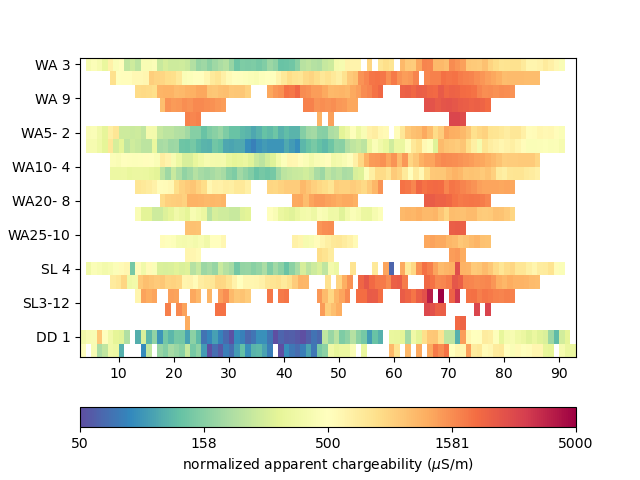

In [8]:
mgr.data['nm'] = mgr.data["IP_#1(mV/V)"]/mgr.data["rhoa"]*1000
mgr.showData(vals="nm", label='normalized apparent chargeability ($\mu$S/m)', cMin=50, cMax=5000)#cMap='cm.imola')# xlabel='apparent chargeability (mV/V)'
plt.savefig('data-nm-filtered.pdf')

05/06/24 - 17:41:54 - pyGIMLi - INFO - Found 2 regions.
05/06/24 - 17:41:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


Mesh: Nodes: 2813 Cells: 5288 Boundaries: 8100


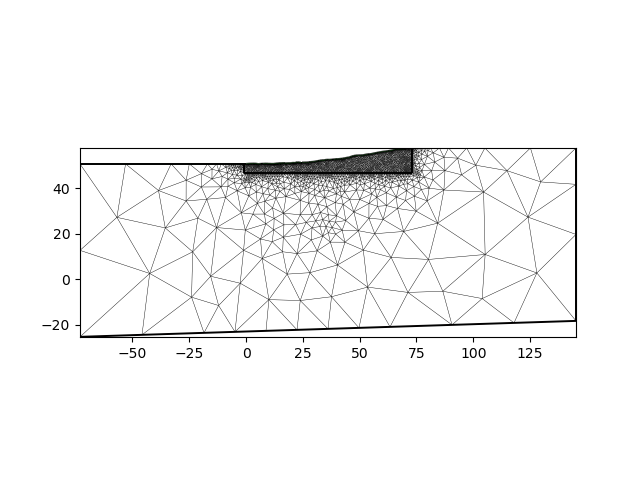

In [9]:
plc = mt.createParaMeshPLC(mgr.data, paraDepth=pd, boundary=1, paraDX=pdx, paraMaxCellSize=pmcs) 
mesh = mt.createMesh(plc, quality=34)
mgr.setMesh(mesh)
pg.show(mesh)
print(mesh)

In [ ]:
if clens:
    mgr.invertDC(verbose=True, robustData=robDat, correlationLengths=clens, dPhi=dPhi)
else:
    mgr.invertDC(verbose=True, robustData=robDat, dPhi=dPhi, blockyModel=blocky)


05/06/24 - 17:41:54 - pyGIMLi - INFO - Creating forward mesh from region infos.
05/06/24 - 17:41:54 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
05/06/24 - 17:41:55 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10913 Cells: 21152 Boundaries: 16200
05/06/24 - 17:41:55 - pyGIMLi - INFO - Use median(data values)=99.4753
05/06/24 - 17:41:55 - pyGIMLi - INFO - Created startmodel from forward operator: 3984, min/max=99.475300/99.475300
05/06/24 - 17:41:55 - pyGIMLi - INFO - Starting inversion.


min/max(dweight) = 50/50
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x7f1c1e7de6b0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x7f1c2072be20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x7f1c1e7de7f0>
min/max (data): 30.34/717
min/max (error): 2%/2%
min/max (start model): 99.48/99.48
--------------------------------------------------------------------------------
Calculating response for model: min = 99.4753 max = 99.4753
Allocating memory for primary potential...... 0.0822266

No primary potential for secondary field calculation with topography.
Creating P2-Primmesh:		Nodes: 42977	Cells: 21152	Boundaries: 32064
ModellingBase::setMesh() copying new mesh ... Found topography for surface=50.7748 : 50.7682
Warning! swap YZ coordinates for sensor positions to meet mesh dimensions.
Found datafile: 96 electrodes
Found: 96 node-electrodes
rMin = 0.0905721, rMax = 144.891
NGauLeg + NGauLag for inverse Fouriertransformation: 19 + 4
Found no

In [ ]:
mgr.showFit()
mgr.showMisfit()
mgr.showMisfit(errorWeighted=True)

In [ ]:
mgr.showResult(cMin=10,cMax=300)
plt.savefig('Res-%s.pdf' %(name))

# Save results
savename = os.path.join('inversionResults',name)
mgr.modelIP = 0
mgr.saveResult(folder=savename)


In [ ]:
# Trying first time windowof TDIP
if clens:
    mgr.invertTDIP(ipdata='IP_#1(mV/V)', verbose=True, robustData=robDat, correlationLengths=clens, dPhi=dPhi)
else:
    mgr.invertTDIP(ipdata='IP_#1(mV/V)', verbose=True, robustData=robDat, dPhi=dPhi, blockyModel=blocky)    

In [ ]:
#mgr.showIPModel(cMin=10,cMax=100,cMap='inferno')
mgr.showIPModel(cMap='inferno')

plt.savefig('IP1-%s.pdf' %(name))

In [ ]:
# Write code to show IP misfit

In [ ]:
nm = mgr.modelIP/mgr.model
#nm = M[:,0].squeeze()/mgr.model

mgr.showModel(nm, label='normalized chargeability')
# This looks great!!!! Interesting!
# Need to chenage the text
plt.savefig('normIP1-%s.pdf' %(name))

In [ ]:
# Do for loop over all time windows.....


maxt = 14
M = np.zeros((len(mgr.model), maxt))
for i in range(1,maxt+1):
    ipdat='IP_#%d(mV/V)' %(i)
    if clens:
        mgr.invertTDIP(ipdata=ipdat, verbose=True, robustData=robDat, correlationLengths=clens, dPhi=dPhi)
    else:
        mgr.invertTDIP(ipdata=ipdat, verbose=True, robustData=robDat, dPhi=dPhi, blockyModel=blocky)    
    M[:,i-1] = mgr.modelIP
    

In [ ]:
# Sum
dt = [0.0166667, 0.0333333, 0.05, 0.0666667, 0.0833333, 0.1, 0.133333, 0.166667, 0.216667, 0.283333, 0.366666, 0.483333, 0.6, 0.8]
Mint = np.array(np.matrix(dt[0:maxt])*np.matrix(M).transpose()).squeeze()
mgr.showModel(Mint*1000,cMap='inferno', label='integrated chargeability')
plt.savefig('IPmint-%s.pdf' %(name))

nm = Mint/mgr.model
mgr.showModel(nm,cMin=1e-4,cMax=0.01, label='normalized integrated chargeability')
plt.savefig('normIPmint-%s.pdf' %(name))

In [ ]:
# Extrapolate
from pybert import tdip
ip = tdip.TDIPdata(filename)
ip.M = M.transpose()
ip.res = mgr.model
print(ip.M.shape)
delay = 0.01
ip.setGates(dt=dt, delay=delay)
ip.M = M.transpose()
ip.fitModelDecays(useColeCole=True)

In [ ]:
mgr.showModel(ip.m0,cMap='inferno', label='chargeability [mV/V]')
plt.savefig('IPm0-%s.pdf' %(name))

nm = ip.m0/mgr.model
mgr.showModel(nm,cMin=1e-4,cMax=0.01, label='normalized chargeability [?]')
plt.savefig('normIPm0-%s.pdf' %(name))

mgr.showModel(ip.tau, label='tau [?]')
plt.savefig('tau-%s.pdf' %(name))

mgr.showModel(ip.c, label='c [-]')
plt.savefig('c-%s.pdf' %(name))

In [ ]:

ip.pd = mesh
savename = os.path.join('inversionResults',name)
ip.saveResults(basename=savename)
np.savetxt(savename+'.cog',mgr.coverage())
ip.saveFit(basename=savename)

In [ ]:
# save chisquare
np.savetxt(savename+'chi2history.txt',mgr.inv.chi2History)

In [ ]:
# Try inverting using SIP with phase angle 1 mrad = 1 mV/V in the first window

In [ ]:
np.sum(dt)+0.01